<a href="https://colab.research.google.com/github/nargesi-gholami/Deep-Learning/blob/main/NNDL_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### import library

In [ ]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.4.2
!pip install --upgrade tensorflow keras
!pip install keras-tuner
!pip install scikeras

Found existing installation: scikit-learn 1.4.2
Uninstalling scikit-learn-1.4.2:
  Successfully uninstalled scikit-learn-1.4.2
  Using cached scikit_learn-1.4.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.4.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)


In [ ]:
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from tensorflow import keras
import keras_tuner as kt
from sklearn.linear_model import LogisticRegression


# 1. Fraud detection in credit cards using multilayer perceptron (MLP) neural networks



## 1.2. preprocessing

### **1.2.1. Load the dataset from Kaggle**

In [ ]:
# Download latest version (already done)
dataset_path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

# The actual file path (inside the downloaded dataset directory)
file_path = f"{dataset_path}/creditcard.csv"

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first 5 rows
print("First 5 records:\n", df.head())


First 5 records:
    Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26   

### **1.2.2. Display summary of the dataset**

In [ ]:
# Display dataset summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.isnull().sum()  # Check for missing values

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


### **1.2.3. Plot a bar chart to show class distribution**

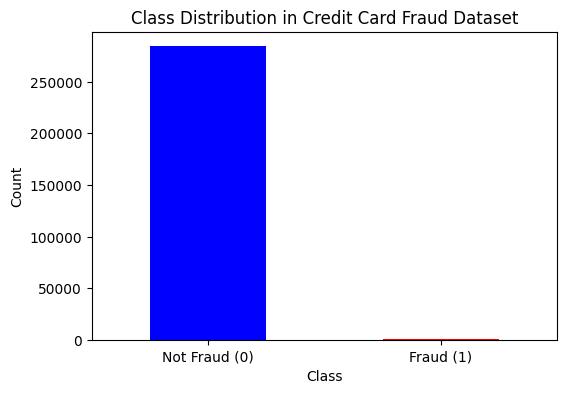

In [ ]:
# Count the number of instances in each class
class_counts = df['Class'].value_counts()

# Plot a bar chart
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['blue', 'red'])
plt.xticks(ticks=[0, 1], labels=['Not Fraud (0)', 'Fraud (1)'], rotation=0)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution in Credit Card Fraud Dataset")
plt.show()


### **1.2.4. Explain class imbalance**

Why is class imbalance challenging?

*   If a model is trained on imbalanced data, it may become biased toward the majority class (non-fraud transactions).

*   The model may achieve high accuracy but fail to detect fraud cases effectively.


*   Special techniques like resampling or cost-sensitive learning are often needed to address imbalance.








### **1.2.5. Normalize features using StandardScaler or MinMaxScaler**

In [ ]:
# Select features to scale (excluding non-numeric ones like 'Class')
features = df.drop(columns=['Class'])

# Apply StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Convert back to DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
df_scaled['Class'] = df['Class']  # Keep the class column unchanged

df_scaled.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,0
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,0
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,0


### **1.2.6. Split the dataset into training (70%) and testing (30%) while maintaining class balance**

In [ ]:
# Define features (X) and target (y)
X = df_scaled.drop(columns=['Class'])
y = df_scaled['Class']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y  # Ensuring class balance
)

# Display the split information
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Class distribution in training set:\n", y_train.value_counts(normalize=True))
print("Class distribution in testing set:\n", y_test.value_counts(normalize=True))


Training set shape: (199364, 30)
Testing set shape: (85443, 30)
Class distribution in training set:
 Class
0    0.998275
1    0.001725
Name: proportion, dtype: float64
Class distribution in testing set:
 Class
0    0.998268
1    0.001732
Name: proportion, dtype: float64


## 1.3. Design and implement MLP (Multi-Layer Perceptron)

### **1.3.1. design MLP**

In [ ]:
# Define MLP Model
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001), input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation
])

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display Model Summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,049 (8.00 KB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 0 (0.00 B)

### **1.3.2. train the model**

Epoch 1/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9945 - loss: 0.0411 - val_accuracy: 0.9990 - val_loss: 0.0068
Epoch 2/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9995 - loss: 0.0046 - val_accuracy: 0.9993 - val_loss: 0.0046
Epoch 3/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9995 - loss: 0.0035 - val_accuracy: 0.9993 - val_loss: 0.0046
Epoch 4/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9994 - loss: 0.0035 - val_accuracy: 0.9993 - val_loss: 0.0043
Epoch 5/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9995 - loss: 0.0030 - val_accuracy: 0.9994 - val_loss: 0.0041
Epoch 6/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9994 - loss: 0.0038 - val_accuracy: 0.9993 - val_loss: 0.0041
Epoch 7/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9994 - loss: 0.0034 - val_accuracy: 0.9993 - val_loss: 0.0041
Epoch 8/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9994 - loss: 0

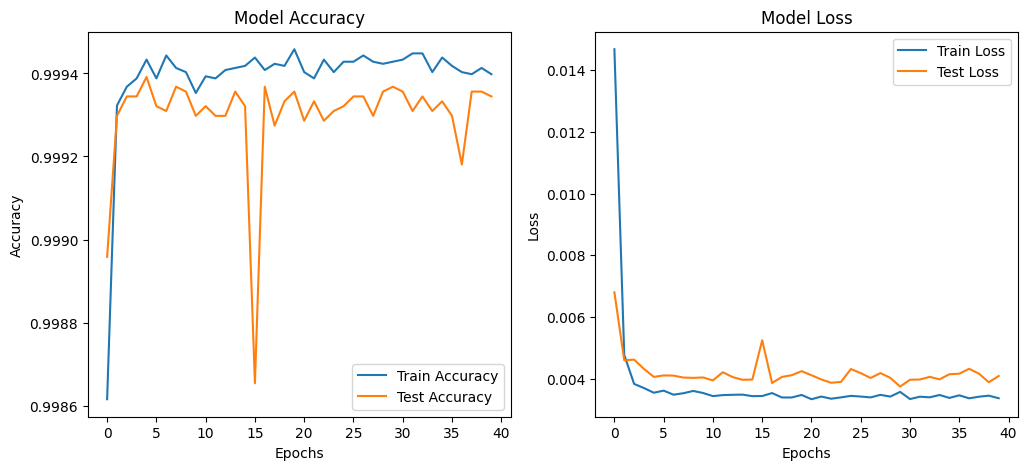

In [ ]:
# Train Model
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plot Accuracy & Loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy")

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Loss")

plt.show()

### **1.3.3. evaluate the model**

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


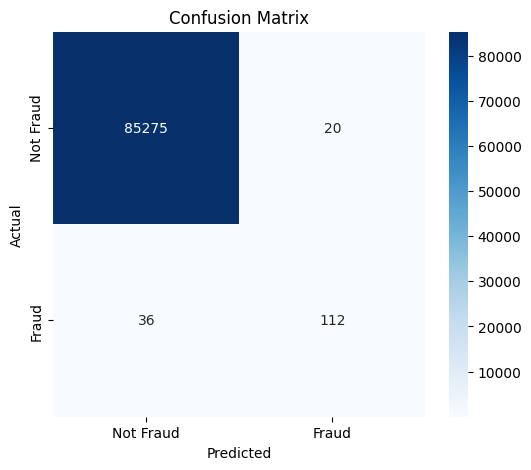

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.76      0.80       148

    accuracy                           1.00     85443
   macro avg       0.92      0.88      0.90     85443
weighted avg       1.00      1.00      1.00     85443



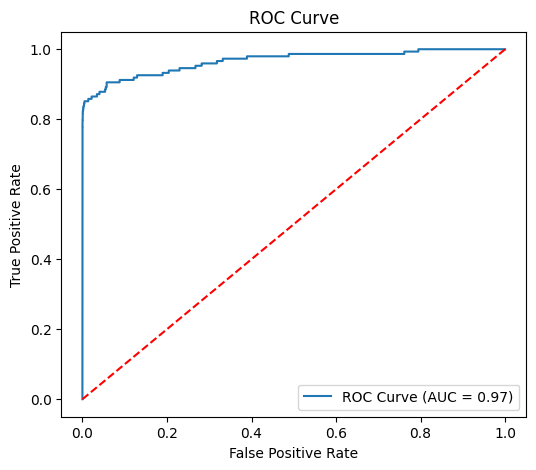

AUC Score: 0.97


In [ ]:
# Make Predictions
y_pred_probs = model.predict(X_test).flatten()  # Get probability scores
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary predictions

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Compute ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print(f"AUC Score: {roc_auc:.2f}")

## 1.4. Design and implement deeper network

Epoch 1/40


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6231/6231 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9974 - loss: 0.0249 - val_accuracy: 0.9993 - val_loss: 0.0059
Epoch 2/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9994 - loss: 0.0051 - val_accuracy: 0.9993 - val_loss: 0.0053
Epoch 3/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.9993 - loss: 0.0043 - val_accuracy: 0.9993 - val_loss: 0.0053
Epoch 4/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9994 - loss: 0.0044 - val_accuracy: 0.9993 - val_loss: 0.0047
Epoch 5/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9994 - loss: 0.0042 - val_accuracy: 0.9993 - val_loss: 0.0046
Epoch 6/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9993 - loss: 0.0043 - val_accuracy: 0.9993 - val_loss: 0.0044
Epoch 7/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9994 - loss: 0.0040 - val_accuracy: 0.9993 - val_loss: 0.0043
Epoch 8/40
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9992 - loss: 0.0041 - val

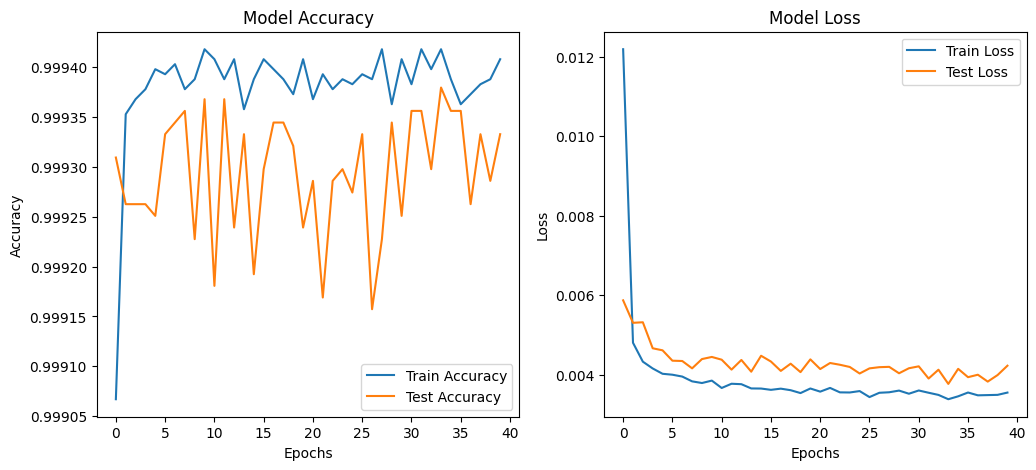

In [ ]:

# Define a Deeper MLP Model
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001), input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation
])

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plot Accuracy & Loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy")

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Loss")

plt.show()

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


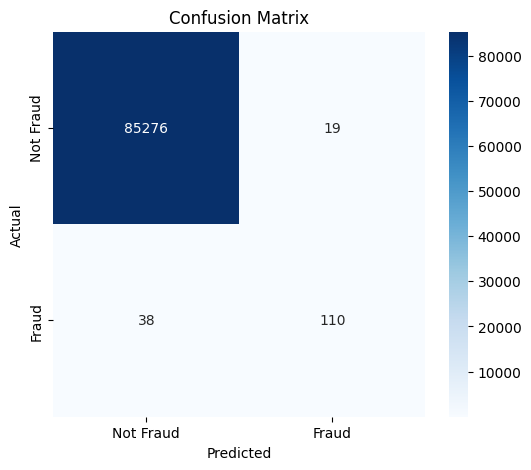

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.74      0.79       148

    accuracy                           1.00     85443
   macro avg       0.93      0.87      0.90     85443
weighted avg       1.00      1.00      1.00     85443



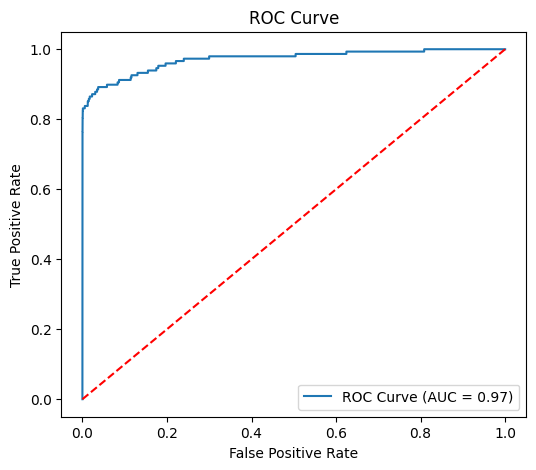

AUC Score: 0.97


In [ ]:
# Evaluate Model
y_pred_probs = model.predict(X_test).flatten()  # Get probability scores
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary predictions

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Compute ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print(f"AUC Score: {roc_auc:.2f}")

## 1.6. Search for the best hyperparameters of a single hidden layer network using a greedy method (Grid)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from scikeras.wrappers import KerasClassifier
import pandas as pd

# # ✅ Ensure correct data format
y_train = np.array(y_train).ravel()  # Flatten target array to avoid shape issues
y_test = np.array(y_test).ravel()

# ✅ Define the function to create a model
def create_model(neurons=128, dropout_rate=0.3, regularization=0.0001):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),  # ✅ Fix for Keras input shape warning
        Dense(neurons, activation='relu', kernel_regularizer=l2(regularization)),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model for GridSearchCV compatibility
model = KerasClassifier(model=create_model, verbose=0)

# ✅ Fix: Use 'model__' prefix in `param_grid`
param_grid = {
    'model__neurons': [256, 128, 64],
    'model__dropout_rate': [0.4, 0.3, 0.2],
    'model__regularization': [0.0001, 0.001],
    'batch_size': [64, 32, 16],
    'epochs': [10]  # Keeping epochs fixed for efficiency
}

# ✅ Disable Cross-Validation using `PredefinedSplit`
cv_split = ShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# ✅ Perform Grid Search with 3-fold CV
grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=cv_split,  # ✅ Corrected to use 3-fold CV
    scoring='accuracy',
    n_jobs=1,  # ✅ Prevent parallel processing issues with TensorFlow
    verbose=2,
    error_score='raise'
)

# Fit Grid Search
grid_result = grid.fit(X_train, y_train)

# Print best parameters
print("\n✅ Best parameters found: ", grid_result.best_params_)
print("📊 Best accuracy score: ", grid_result.best_score_)

# Convert results to a DataFrame for analysis
results_df = pd.DataFrame(grid_result.cv_results_)

# Select relevant columns
results_df = results_df[['param_model__neurons', 'param_model__dropout_rate',
                         'param_model__regularization', 'param_batch_size', 'mean_test_score']]

# Display results in a table
print(results_df)

# ✅ Train the final model with the best parameters
best_params = grid_result.best_params_
best_model = create_model(
    neurons=best_params['model__neurons'],
    dropout_rate=best_params['model__dropout_rate'],
    regularization=best_params['model__regularization']
)

history = best_model.fit(
    X_train, y_train, validation_data=(X_test, y_test),
    batch_size=best_params['batch_size'], epochs=10, verbose=1
)

# Evaluate the final model
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print("🏆 Final test accuracy: ", test_acc)


## 1.7. Comparison of MLP model or Logistic Regression model with a scoring system

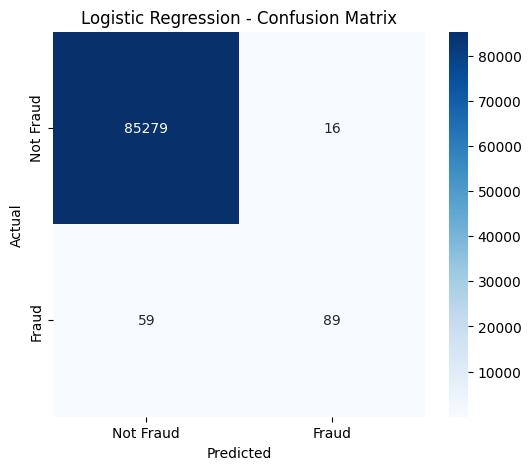

Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.60      0.70       148

    accuracy                           1.00     85443
   macro avg       0.92      0.80      0.85     85443
weighted avg       1.00      1.00      1.00     85443



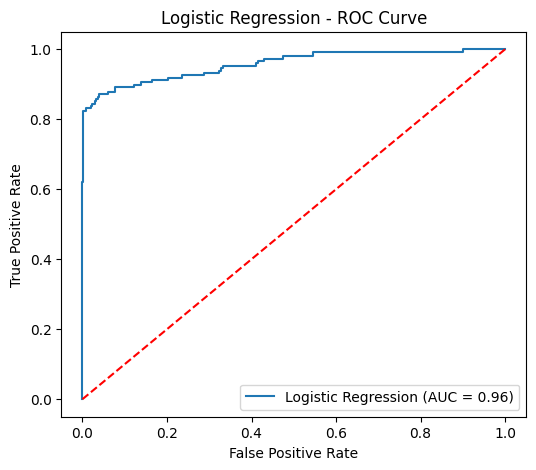

Logistic Regression AUC Score: 0.96


In [ ]:
# Train Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predict using Logistic Regression
y_pred_probs_lr = logistic_model.predict_proba(X_test)[:, 1]  # Get probability scores
y_pred_lr = logistic_model.predict(X_test)

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

# Classification Report
report_lr = classification_report(y_test, y_pred_lr)
print("Logistic Regression - Classification Report:\n", report_lr)

# Compute ROC Curve and AUC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_probs_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression - ROC Curve")
plt.legend()
plt.show()

print(f"Logistic Regression AUC Score: {roc_auc_lr:.2f}")